In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [115]:
data = pd.read_csv('diabetes2.csv')

In [116]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [118]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [119]:
data.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Length: 768, dtype: int64

In [120]:
data.duplicated().sum()

0

In [121]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


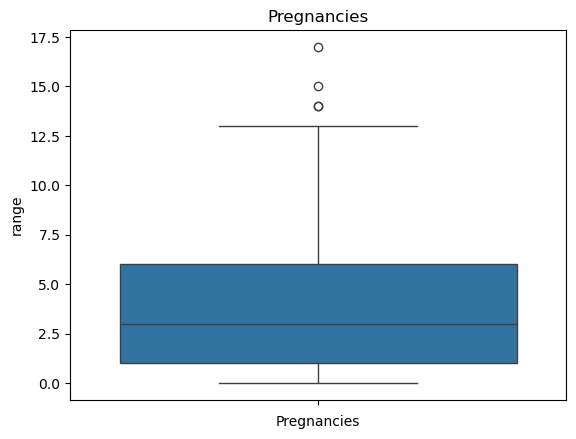

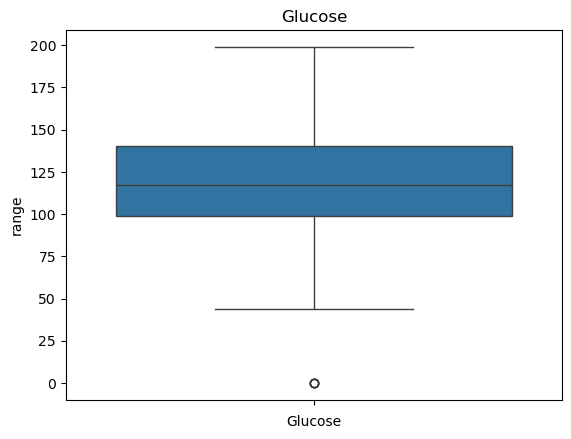

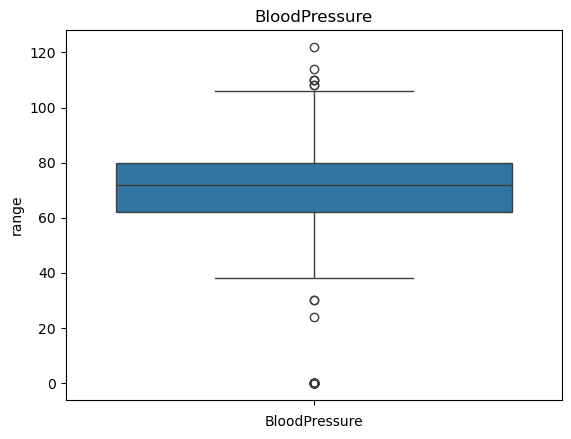

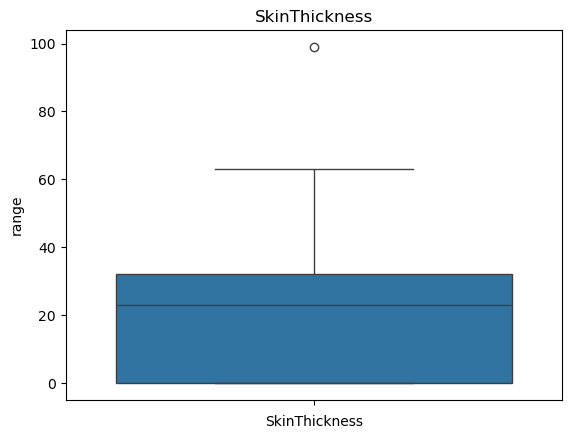

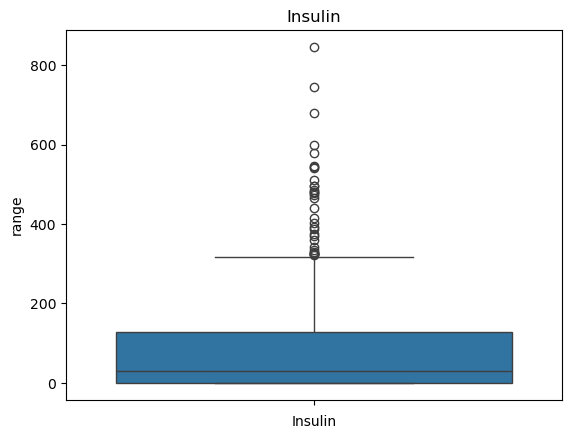

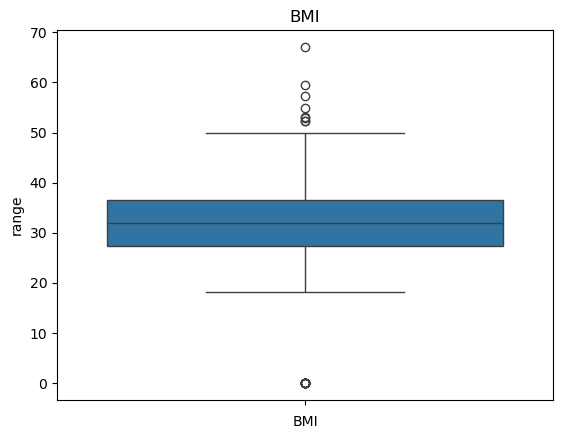

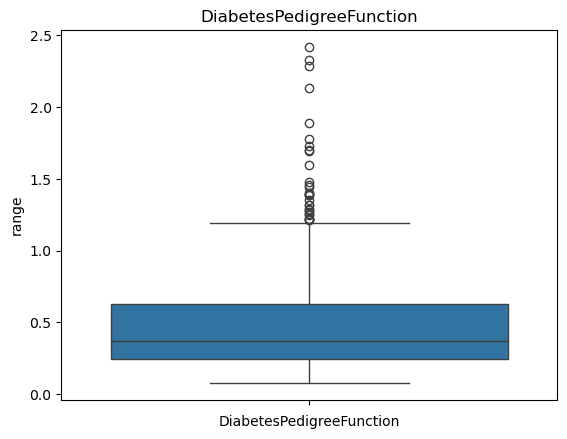

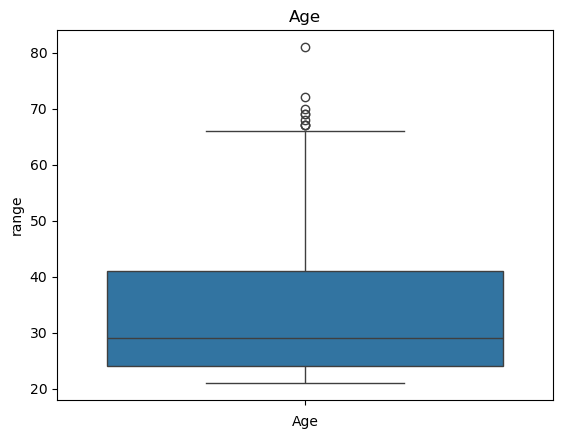

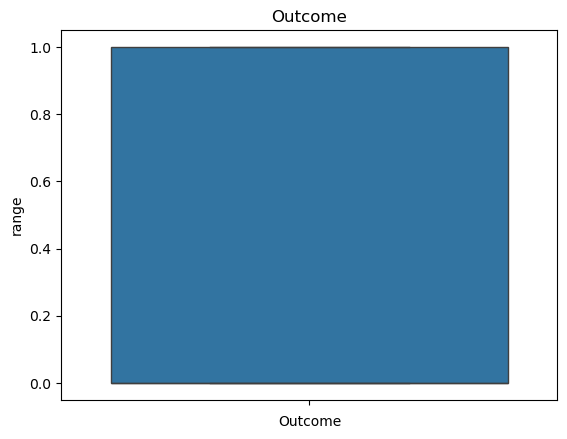

In [122]:
data.columns
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel('range')
        plt.title(i)
        plt.show()

In [123]:
data.shape

(768, 9)

In [124]:
col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in col:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    LF=Q1-1.5*IQR
    UF=Q3+1.5*IQR
    data=data[(data[i]>=LF) & (data[i]<=UF)]

In [125]:
data.shape

(636, 9)

In [126]:
X = data.drop(columns = 'Outcome') 
y = data['Outcome']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [129]:
X_train=pd.DataFrame(X_train) 

In [130]:
X_train

,0,1,2,3,4,5,6,7
0,-0.549881,-0.675134,-1.065613,-0.242706,1.106950,0.683156,0.121217,-1.053360
1,1.608530,-0.570940,0.342815,1.073830,-0.819770,0.115044,0.990316,1.219352
2,0.066808,0.366799,-1.065613,-0.571840,1.961932,-0.714093,0.424582,-0.144275
3,-0.549881,0.123681,-0.185345,0.415562,-0.819770,0.713865,-0.342030,-0.507909
4,0.991841,0.505723,1.399137,-0.374360,1.046740,0.038272,-0.661793,0.401176
...,...,...,...,...,...,...,...,...
535,0.066808,0.158412,0.694923,-0.374360,1.299622,-0.023145,0.080222,0.128450
536,1.300186,-1.196100,0.166762,0.678869,-0.819770,0.944181,0.137615,0.582993
537,2.533563,-0.432016,0.694923,-1.361762,-0.819770,-1.312914,-1.174233,1.037535
538,-1.166570,-0.049974,-0.537452,0.678869,1.444126,-0.207398,0.285198,-0.962451


In [131]:
X_test=pd.DataFrame(X_test) 

In [132]:
X_test

,0,1,2,3,4,5,6,7
0,1.608530,1.165614,0.518869,0.876350,1.239412,0.314651,1.925008,0.037542
1,1.916874,-0.605672,0.342815,1.797925,1.347790,0.115044,-1.034849,2.764796
2,-0.549881,-1.161369,-0.625479,-1.361762,-0.819770,1.143788,2.076691,-0.507909
3,0.375152,0.991958,0.254789,-1.361762,-0.819770,-0.345587,0.043326,-0.417000
4,0.066808,0.783572,0.166762,-1.361762,-0.819770,-0.698738,-0.735584,0.673901
...,...,...,...,...,...,...,...,...
91,-0.241536,0.818303,0.694923,-0.374360,-0.819770,0.038272,-0.915963,2.764796
92,-0.858225,1.582387,0.870976,1.468791,-0.012956,0.099690,-0.337930,1.582986
93,0.375152,0.609916,1.047030,1.337138,0.239926,0.437486,-0.563404,0.219359
94,0.683497,1.617118,-0.361399,0.349735,1.203286,0.222525,0.850933,1.492077


In [133]:
log_reg = LogisticRegression(max_iter = 600)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [134]:
y_pred = log_reg.predict(X_test)

In [135]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [136]:
accuracy_score(y_test, y_pred)

0.6770833333333334

In [137]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [138]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5454545454545454
0.36363636363636365
0.43636363636363634


In [139]:
confusion_matrix(y_test, y_pred)

array([[53, 10],
       [21, 12]], dtype=int64)

In [140]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [141]:
X_train

array([[0.15384615, 0.35714286, 0.32352941, ..., 0.58598726, 0.34690102,
        0.        ],
       [0.69230769, 0.37662338, 0.55882353, ..., 0.46815287, 0.54301573,
        0.56818182],
       [0.30769231, 0.55194805, 0.32352941, ..., 0.29617834, 0.41535615,
        0.22727273],
       ...,
       [0.92307692, 0.4025974 , 0.61764706, ..., 0.17197452, 0.05457909,
        0.52272727],
       [0.        , 0.47402597, 0.41176471, ..., 0.40127389, 0.38390379,
        0.02272727],
       [0.        , 0.3961039 , 0.67647059, ..., 0.3089172 , 0.613321  ,
        0.93181818]])

In [142]:
log_reg = LogisticRegression(max_iter = 650)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.6875

In [143]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [144]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5714285714285714
0.36363636363636365
0.4444444444444444


In [145]:
confusion_matrix(y_test, y_pred)

array([[54,  9],
       [21, 12]], dtype=int64)

In [147]:
from sklearn.datasets import load_breast_cancer

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
cancer=load_breast_cancer()
X,y=cancer.data, cancer.target

In [150]:
X.shape

(569, 30)

In [154]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [157]:
(y==0).sum()

212

In [158]:
(y==1).sum()

357

In [159]:
df = pd.DataFrame(data=cancer.data,
                  columns=cancer.feature_names)


In [161]:
df['target'] = cancer.target

In [164]:
df.head(25)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,0


In [165]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [166]:
df['target'].unique()

array([0, 1])

In [167]:
df.shape

(569, 31)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform (X_test)

In [181]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# model.fit(X_train, y_train)


In [182]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Anushka Sharma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [183]:
y_pred=model.predict(X_train)

In [184]:
y_pred_1=model.predict(X_test)

In [185]:
print(f"Training accuracy : {accuracy_score(y_train,y_pred)}")
print(f"Testing accuracy : {accuracy_score(y_test,y_pred_1)}")

Training accuracy : 0.9582417582417583
Testing accuracy : 0.956140350877193


Standardization must be done after splitting the data into training and testing sets. 
This should be done so because if we apply standardisation to the entire dataset, then, 
the training data would be scaled using the information from the test data, giving our model an unfair
advantage wherein it would be exposed to the future information. This will also result in the model
being subject to data leakage.